In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

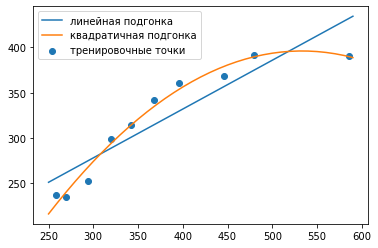

In [2]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию
X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии
pr = LinearRegression() # Полиномиальная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

plt.scatter(X, y, label = 'тренировочные точки') 
plt.plot(X_, y_lr, label = 'линейная подгонка') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()

In [10]:
y_pred = lr.predict(X)
print('Для линейной регрессии:', mean_squared_error(y, y_pred))

Для линейной регрессии: 569.7796663183207


In [12]:
y_pred = pr.predict(X_quad)
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pred))

Для полиномиальной регрессии: 61.330214517447715


Среднеквадратичная ошибка полиномиальной регрессии значительно меньше чем у линейной регрессии, что говорит о более высокой точности модели.

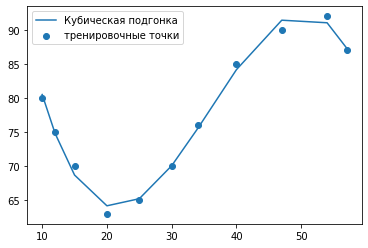

In [25]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])
pr_1 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(x)   
pr_1.fit(X_cub, y)
y_pr = pr_1.predict(cube.fit_transform(x))

plt.scatter(х, y, label = 'тренировочные точки') 
plt.plot(x, y_pr, label = 'Кубическая подгонка') 
plt.legend(loc='upper left') 
plt.show()

In [47]:
pr_2 = LinearRegression()
Fig = PolynomialFeatures(degree=2)
X_2 = Fig.fit_transform(x)   
pr_2.fit(X_2, y)
y_pr_2 = pr_2.predict(Fig.fit_transform(x))

pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(x)   
pr_5.fit(X_5, y)
y_pr_5 = pr_5.predict(Fig.fit_transform(x))

pr_15 = LinearRegression()
Fig = PolynomialFeatures(degree=15)
X_15 = Fig.fit_transform(x)   
pr_15.fit(X_15, y)
y_pr_15 = pr_15.predict(Fig.fit_transform(x))

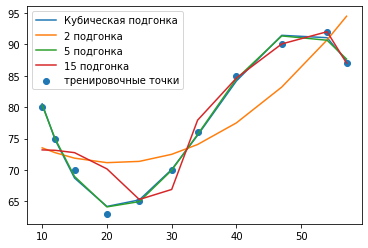

In [48]:
plt.scatter(х, y, label = 'тренировочные точки') 
plt.plot(x, y_pr, label = 'Кубическая подгонка') 
plt.plot(x, y_pr_2, label = '2 подгонка') 
plt.plot(x, y_pr_5, label = '5 подгонка') 
plt.plot(x, y_pr_15, label = '15 подгонка') 
plt.legend(loc='upper left') 
plt.show()

In [49]:
y_pred = pr_1.predict(X_cub)
print('Для кубической регрессии:', mean_squared_error(y, y_pred))

Для кубической регрессии: 0.6786245292433363


In [50]:
y_pred = pr_2.predict(X_2)
print('Для 2 регрессии:', mean_squared_error(y, y_pred))

Для 2 регрессии: 29.794158346622236


In [51]:
y_pred = pr_5.predict(X_5)
print('Для 5 регрессии:', mean_squared_error(y, y_pred))

Для 5 регрессии: 0.6219192413410219


In [52]:
y_pred = pr_15.predict(X_15)
print('Для 15 регрессии:', mean_squared_error(y, y_pred))

Для 15 регрессии: 11.129732637529965


In [53]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(pr_1, X_cub, y, cv=5)
np.mean(cross)

-1.0566328675161862

In [54]:
cross = cross_val_score(pr_2, X_2, y, cv=5)
np.mean(cross)

-62.18372988613684

In [55]:
cross = cross_val_score(pr_5, X_5, y, cv=5)
np.mean(cross)

-4.831773965827461

In [56]:
cross = cross_val_score(pr_15, X_15, y, cv=5)
np.mean(cross)

-145421095457.86